<a href="https://colab.research.google.com/github/23subbhashit/MT2023065_ML_ASSIGNMENT/blob/main/A1_Using_Random_forest_(colab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
url = 'https://drive.google.com/uc?id={}'.format("1jqVrX0mI5tQMw5lKXL3SIPa01w4q9EOr")

In [3]:
data = pd.read_csv(url)

In [4]:
data.head()

,sofifa_id,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
0,158023,L. Messi,93,93,78000000.0,320000.0,34,170,72,73.0,...,20,35,24,6,11,15,14,8,NaN,1
1,188545,R. Lewandowski,92,92,119500000.0,270000.0,32,185,81,21.0,...,35,42,19,15,6,12,8,10,NaN,1
2,20801,Cristiano Ronaldo,91,91,45000000.0,270000.0,36,187,83,11.0,...,24,32,24,7,11,15,14,11,NaN,1
3,190871,Neymar Jr,91,91,129000000.0,270000.0,29,175,68,73.0,...,35,32,29,9,9,15,15,11,NaN,1
4,192985,K. De Bruyne,91,91,125500000.0,350000.0,30,181,70,10.0,...,68,65,53,15,13,5,10,13,NaN,1


In [5]:
import numpy as np
np.unique(data["contribution_type"])

array([0, 1])

<Axes: xlabel='contribution_type', ylabel='count'>

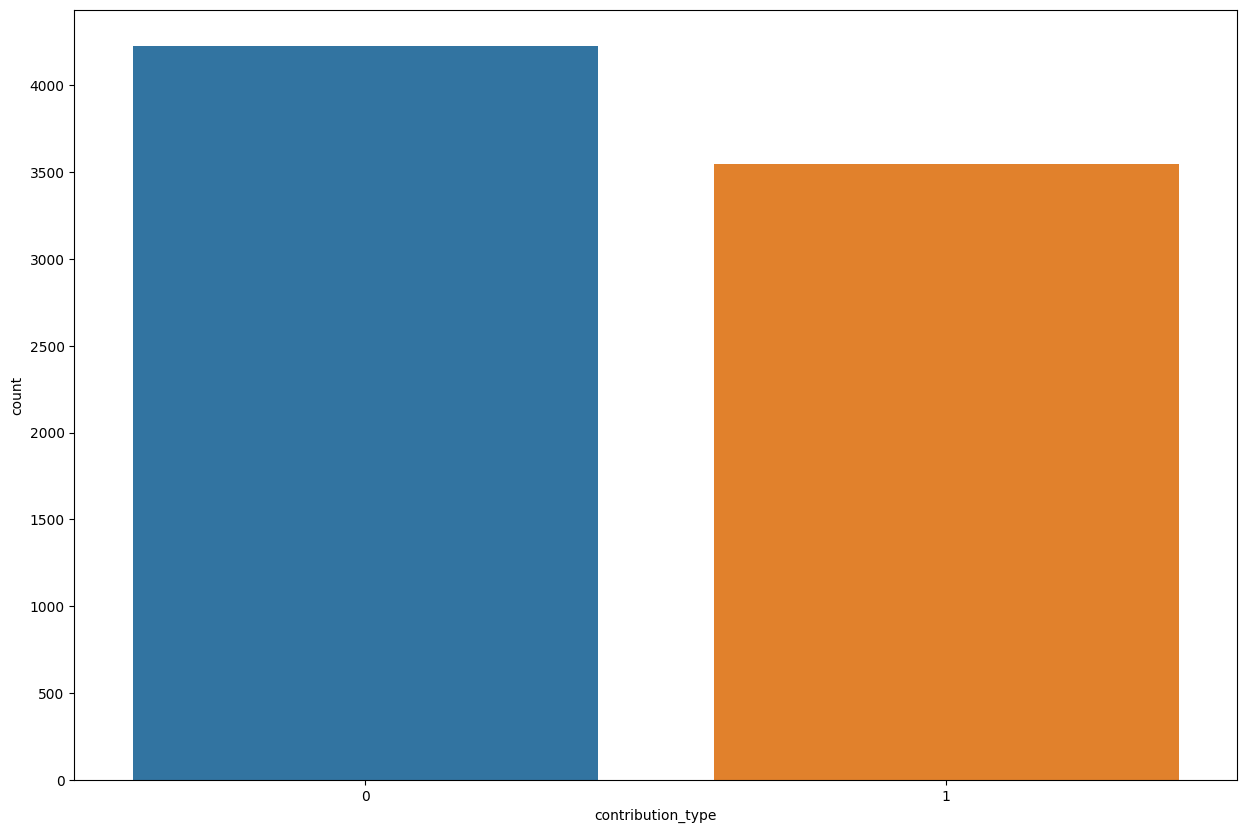

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.countplot(data,x='contribution_type')

In [7]:
col = data.columns[data.isna().any()].tolist()
col = col + ["sofifa_id","short_name" ]
x = data.drop(col,axis=1)
x.head()

,overall,potential,age,height_cm,weight_kg,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,contribution_type
0,93,93,34,170,72,Left,4,4,5,Medium/Low,...,96,20,35,24,6,11,15,14,8,1
1,92,92,32,185,81,Right,4,4,5,High/Medium,...,88,35,42,19,15,6,12,8,10,1
2,91,91,36,187,83,Right,4,5,5,High/Low,...,95,24,32,24,7,11,15,14,11,1
3,91,91,29,175,68,Right,5,5,5,High/Medium,...,93,35,32,29,9,9,15,15,11,1
4,91,91,30,181,70,Right,5,4,4,High/High,...,89,68,65,53,15,13,5,10,13,1


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_features = ["preferred_foot","work_rate","body_type" ]
for each in categorical_features:
    x[each] = encoder.fit_transform(x[each])

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_features = ["preferred_foot","work_rate","body_type" ]
for each in categorical_features:
    x[each] = encoder.fit_transform(x[each])

In [10]:
from sklearn.ensemble import RandomForestClassifier
X_train = x.drop('contribution_type', axis=1).values
y_train = x['contribution_type'].values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [13]:
clf_gini = RandomForestClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8958


In [15]:
clf_gini = RandomForestClassifier(criterion='entropy')
clf_gini.fit(X_train, y_train)
y_pred_entropy = clf_gini.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_entropy)))

Model accuracy score with criterion entropy: 0.8932


In [17]:
clf_gini = RandomForestClassifier(criterion='log_loss')
clf_gini.fit(X_train, y_train)
y_pred_log_loss = clf_gini.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_log_loss)))

Model accuracy score with criterion entropy: 0.8926


# Regression

In [19]:
from sklearn.ensemble import RandomForestRegressor
X_train = x.drop('overall', axis=1).values
y_train = x['overall'].values

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [21]:
clf_reg = RandomForestRegressor(criterion="squared_error")
clf_reg.fit(X_train, y_train)
y_pred_squared_error = clf_reg.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("MAE : ",mean_absolute_error(y_test,y_pred_squared_error))
print("MSE : ",mean_squared_error(y_test,y_pred_squared_error))
print("R2 SCORE : ",r2_score(y_test,y_pred_squared_error))

MAE :  0.6701929260450162
MSE :  1.0485012861736334
R2 SCORE :  0.9721107857347983


In [23]:
clf_reg = RandomForestRegressor(criterion="absolute_error")
clf_reg.fit(X_train, y_train)
y_pred_absolute_error = clf_reg.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("MAE : ",mean_absolute_error(y_test,y_pred_absolute_error))
print("MSE : ",mean_squared_error(y_test,y_pred_absolute_error))
print("R2 SCORE : ",r2_score(y_test,y_pred_absolute_error))

MAE :  0.6875755627009649
MSE :  1.066459421221865
R2 SCORE :  0.9716331150988458
